# KAGGLE

# Titanic: Machine Learning from Disaster

### Predict survival on the Titanic and get familiar with ML basics

# 1 - Importando os dados

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('./data/train.csv')

In [3]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2 - Tratando os dados

In [4]:
df.info() #vendo colunas com brancos e Nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
median_age = df.Age.median() #calculando a média de idades

In [6]:
df.Age.fillna(median_age, inplace=True)

In [7]:
df.info() #vendo colunas com brancos e Nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
nulos = df[df['Embarked'].isnull()]
nulos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
df['Embarked'].value_counts(dropna=False).nlargest(7) #verficando os dados em embarked

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [10]:
df.Embarked.fillna("S", inplace=True)

In [11]:
df['Embarked'].value_counts(dropna=False).nlargest(7) #verficando os dados em embarked

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df.info() #vendo colunas com brancos e Nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
df['Cabin'].value_counts(dropna=False).nlargest(7)

NaN            687
C23 C25 C27      4
B96 B98          4
G6               4
F2               3
D                3
C22 C26          3
Name: Cabin, dtype: int64

In [14]:
no_cabin = df[df['Cabin'].isnull()]
no_cabin.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [15]:
df['Pclass'].value_counts(dropna=False).nlargest(7)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
df['Cabin_alias'] = df['Cabin'].str[0:1]

In [17]:
df['Cabin_alias'].value_counts(dropna=False).nlargest(7)

NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
Name: Cabin_alias, dtype: int64

In [18]:
df['Cabin_alias'] = df['Cabin_alias'].fillna('W')

In [19]:
df.info() #vendo colunas com brancos e Nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Cabin_alias    891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [20]:
def find_title(linha):
    
    procurando1 = 'Mr.' 
    procurando2 = 'Mrs.'
    procurando3 = 'Miss.'
    procurando4 = 'Master.'
    procurando5 = 'Rev.'
    procurando6 = 'Dr.'
    
    if procurando1 in linha['Name']:
        return procurando1
    elif procurando2 in linha['Name']:
        return procurando2
    elif procurando3 in linha['Name']:
        return procurando3  
    elif procurando4 in linha['Name']:
        return procurando4
    elif procurando5 in linha['Name']:
        return procurando5
    elif procurando6 in linha['Name']:
        return procurando6
    else:
        return "Others"
    
df['Title'] = df.apply(find_title, axis=1) 

In [21]:
df['Title'].value_counts(dropna=False).nlargest(7)

Mr.        517
Miss.      182
Mrs.       125
Master.     40
Others      14
Dr.          7
Rev.         6
Name: Title, dtype: int64

In [22]:
no_title = df[df['Title'].isnull()]
no_title.head(67)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_alias,Title


In [23]:
def find_class(linha):
    
    classe1 = 1
    classe2 = 2
    classe3 = 3
    
    if linha['Pclass']==1:
        return "First-Class"
    elif linha['Pclass']==2:
        return "Second-Class"
    elif linha['Pclass']==3:
        return "Third-Class"  
    
df['Class_Name'] = df.apply(find_class, axis=1) 

In [24]:
no_class = df[df['Class_Name'].isnull()]
no_class.head(67)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_alias,Title,Class_Name


In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_alias,Title,Class_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,W,Mr.,Third-Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.,First-Class
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,W,Miss.,Third-Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs.,First-Class
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,W,Mr.,Third-Class


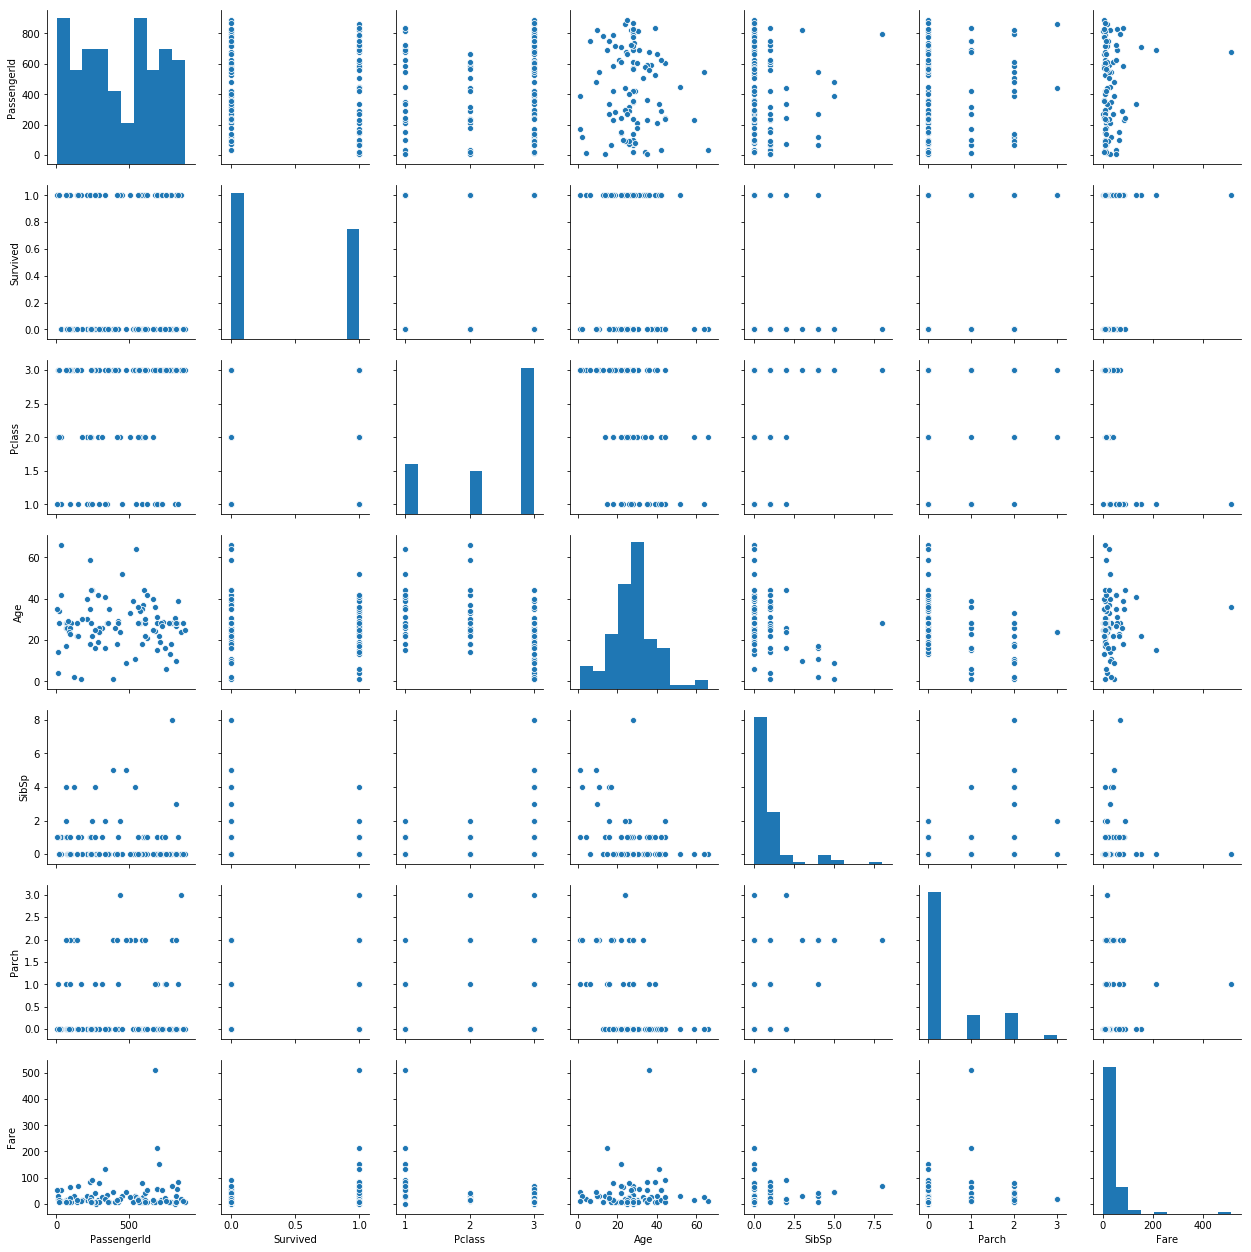

In [26]:
import seaborn as sns

sns.pairplot(df.sample(100))

# 3 - Criando Dummies

In [27]:
df_dummies = ['Class_Name', 'Sex', 'Embarked', 'Cabin_alias', 'Title', 'Class_Name']

In [28]:
df_dummies = pd.get_dummies(df, columns=['Class_Name', 'Sex', 'Embarked', 'Cabin_alias', 'Title', 'Class_Name'])

In [29]:
df_dummies

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Dr.,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Others,Title_Rev.,Class_Name_First-Class,Class_Name_Second-Class,Class_Name_Third-Class
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,1,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,1,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,0,0,0,1,0,0,0,0,0,1
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,NaN,...,0,0,0,1,0,0,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,...,0,0,0,1,0,0,0,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,...,0,1,0,0,0,0,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,...,0,0,0,0,1,0,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,...,0,0,0,0,1,0,0,0,1,0


In [30]:
df_dummies = df_dummies.drop('Sex_female', axis=1)

In [31]:
list(df_dummies)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Class_Name_First-Class',
 'Class_Name_Second-Class',
 'Class_Name_Third-Class',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Cabin_alias_A',
 'Cabin_alias_B',
 'Cabin_alias_C',
 'Cabin_alias_D',
 'Cabin_alias_E',
 'Cabin_alias_F',
 'Cabin_alias_G',
 'Cabin_alias_T',
 'Cabin_alias_W',
 'Title_Dr.',
 'Title_Master.',
 'Title_Miss.',
 'Title_Mr.',
 'Title_Mrs.',
 'Title_Others',
 'Title_Rev.',
 'Class_Name_First-Class',
 'Class_Name_Second-Class',
 'Class_Name_Third-Class']

# 4 - Importando função train_test_split 

In [32]:
from sklearn.model_selection import train_test_split

df_numeric = df_dummies.select_dtypes(include=[np.number]) 
numericas = list(df_numeric)

X = df_dummies[numericas].drop(['Survived'], axis = 1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [33]:
list(df_numeric)

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Class_Name_First-Class',
 'Class_Name_Second-Class',
 'Class_Name_Third-Class',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Cabin_alias_A',
 'Cabin_alias_B',
 'Cabin_alias_C',
 'Cabin_alias_D',
 'Cabin_alias_E',
 'Cabin_alias_F',
 'Cabin_alias_G',
 'Cabin_alias_T',
 'Cabin_alias_W',
 'Title_Dr.',
 'Title_Master.',
 'Title_Miss.',
 'Title_Mr.',
 'Title_Mrs.',
 'Title_Others',
 'Title_Rev.',
 'Class_Name_First-Class',
 'Class_Name_Second-Class',
 'Class_Name_Third-Class']

### 4.1 - Regressão Logística

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
modelo = LogisticRegression()

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [36]:
y_pred 

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [37]:
modelo.score(X_train, y_train)

0.85553772070626

### 4.2 - Cross Value Score

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
cross_val_score(modelo, X_train, y_train, cv = 10, scoring='r2').mean()

0.2926477146042365

In [40]:
import sklearn 
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [41]:
cross_val_score(modelo, X_train, y_train, cv = 10, scoring='accuracy').mean()

0.8349854390681003

In [42]:
cross_val_score(modelo, X_train, y_train, cv = 10, scoring='roc_auc').mean()

0.857230699554069

# 5 - Testando Vários Modelos

In [43]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[133,  24],
       [ 26,  85]], dtype=int64)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
    ]

for modelo in classifiers:
    modelo.fit(X, y)
    name = modelo.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    y_pred = modelo.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

KNeighborsClassifier
****Results****
Accuracy: 0.8208955223880597
Precision: 0.8705882352941177
Recall: 0.6666666666666666
GaussianNB
****Results****
Accuracy: 0.753731343283582
Precision: 0.68
Recall: 0.7657657657657657
LogisticRegression
****Results****
Accuracy: 0.8208955223880597
Precision: 0.7837837837837838
Recall: 0.7837837837837838
SVC
****Results****
Accuracy: 0.9664179104477612
Precision: 0.9903846153846154
Recall: 0.9279279279279279
DecisionTreeClassifier
****Results****
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
RandomForestClassifier
****Results****
Accuracy: 0.9925373134328358
Precision: 1.0
Recall: 0.9819819819819819
GradientBoostingClassifier
****Results****
Accuracy: 0.9029850746268657
Precision: 0.9292929292929293
Recall: 0.8288288288288288


# 6 - Treinando o Melhor Modelo

In [103]:
from sklearn.ensemble import RandomForestClassifier

modelo_final_RF = RandomForestClassifier()

modelo_final_RF.fit(X, y)

print(modelo_final_RF.score(X_train, y_train))
print(modelo_final_RF.score(X_test, y_test))

0.9743178170144462
0.996268656716418


# 7 - Rodar a Previsão de Sobreviventes

In [104]:
df_new = pd.read_csv('./data/test.csv')

In [105]:
median_age = df_new.Age.median() #calculando a média de idades
df_new.Age.fillna(median_age, inplace=True)

median_fare = df_new.Fare.median() #calculando a média de fares
df_new.Fare.fillna(median_fare, inplace=True)


In [106]:
df_new.Embarked.fillna("S", inplace=True)

In [107]:
df_new['Cabin_alias'] = df_new['Cabin'].str[0:1]
df_new['Cabin_alias'] = df_new['Cabin_alias'].fillna('W')

In [108]:
df_new['Cabin_alias'].value_counts(dropna=False).nlargest(7)

W    327
C     35
B     18
D     13
E      9
F      8
A      7
Name: Cabin_alias, dtype: int64

In [109]:
df_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_alias
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,W
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,W
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,W
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,W
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,W


In [110]:
def find_title_new(linha):
    
    procurando1 = 'Mr.' 
    procurando2 = 'Mrs.'
    procurando3 = 'Miss.'
    procurando4 = 'Master.'
    procurando5 = 'Rev.'
    procurando6 = 'Dr.'
    
    if procurando1 in linha['Name']:
        return procurando1
    elif procurando2 in linha['Name']:
        return procurando2
    elif procurando3 in linha['Name']:
        return procurando3  
    elif procurando4 in linha['Name']:
        return procurando4
    elif procurando5 in linha['Name']:
        return procurando5
    elif procurando6 in linha['Name']:
        return procurando6
    else:
        return "Others"
    
df_new['Title'] = df_new.apply(find_title_new, axis=1) 

In [111]:
def find_class_new(linha):
    
    classe1 = 1
    classe2 = 2
    classe3 = 3
    
    if linha['Pclass']==1:
        return "First-Class"
    elif linha['Pclass']==2:
        return "Second-Class"
    elif linha['Pclass']==3:
        return "Third-Class"  
    
df_new['Class_Name'] = df_new.apply(find_class_new, axis=1) 

In [112]:
df_new_dummies = pd.get_dummies(df_new, columns=['Class_Name', 'Sex', 'Embarked', 'Cabin_alias', 'Title'], drop_first=True)

In [113]:
df_new_dummies.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Class_Name_Second-Class,...,Cabin_alias_E,Cabin_alias_F,Cabin_alias_G,Cabin_alias_W,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Others,Title_Rev.
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,...,0,0,0,1,0,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,...,0,0,0,1,0,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,...,0,0,0,1,0,0,1,0,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,...,0,0,0,1,0,0,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,...,0,0,0,1,0,0,0,1,0,0


In [114]:
df_new_dummies = df_new_dummies.drop('Cabin', axis=1)
df_new_dummies = df_new_dummies.drop('Name', axis=1)
df_new_dummies = df_new_dummies.drop('Ticket', axis=1)

In [115]:
list(df_new_dummies)

['PassengerId',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Class_Name_Second-Class',
 'Class_Name_Third-Class',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S',
 'Cabin_alias_B',
 'Cabin_alias_C',
 'Cabin_alias_D',
 'Cabin_alias_E',
 'Cabin_alias_F',
 'Cabin_alias_G',
 'Cabin_alias_W',
 'Title_Master.',
 'Title_Miss.',
 'Title_Mr.',
 'Title_Mrs.',
 'Title_Others',
 'Title_Rev.']

In [116]:
for x in list(X):
    
    if x not in list(df_new_dummies):
        
        df_new_dummies[x] = 0

In [117]:
X_Real = df_new_dummies[list(X)] #determinando o X

In [118]:
yhat_real = modelo_final_RF.predict(X_Real) #

In [119]:
yhat_real

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [120]:
df_new['Survived'] = yhat_real
df_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_alias,Title,Class_Name,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,W,Mr.,Third-Class,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,W,Mrs.,Third-Class,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,W,Mr.,Second-Class,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,W,Mr.,Third-Class,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,W,Mrs.,Third-Class,0


In [123]:
df_resultado = pd.DataFrame(df_new, columns=['PassengerId','Survived'])

In [124]:
df_resultado.to_csv(r'./sample_submission.csv', index=False)